#Project_ML

| Element            | Content |
|--------------------|---------|
| Features involved  | 30 WDBC features (e.g., radius, texture, area, perimeter, etc.) |
| Parameters         | w (weights) and b (bias) — hyperplane: f(x) = w·x + b |
| Hyperparameters    | C (regularization), learning rate, standardization, epochs |




### Data understanding

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. CHARGEMENT ET PREMIER APERÇU
print("="*60)
print("🔍 ANALYSE EXPLORATOIRE DES DONNÉES MÉDICALES")
print("="*60)

df = pd.read_csv('data.csv')
print(f"📊 Dataset shape: {df.shape}")


🔍 ANALYSE EXPLORATOIRE DES DONNÉES MÉDICALES
📊 Dataset shape: (569, 33)


In [5]:
df.drop(['id' , 'Unnamed: 32'] ,axis=1 , inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 2. Qualité des données
print("\nMissing Values Total:", df.isnull().sum().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)


Missing Values Total: 0

Duplicates: 0

Data Types:
 diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
c

In [7]:
# Check for anomalies (negative values in numeric features)
numeric_cols = df.select_dtypes(include=np.number).columns
anomalies = (df[numeric_cols] < 0).sum().sum()
print("\nAnomalies (negative values):", anomalies)


Anomalies (negative values): 0


In [8]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize=True).round(3) * 100)

diagnosis
0    357
1    212
Name: count, dtype: int64
diagnosis
0    62.7
1    37.3
Name: proportion, dtype: float64


In [9]:
# 3. Séparation features / target
X = df.drop('diagnosis', axis=1)      # les 30 features
y = df['diagnosis']

In [10]:
# 5. Statistiques descriptives
print("\nStatistiques descriptives (comme dans le papier) :")
display(X.describe().T.round(4))


Statistiques descriptives (comme dans le papier) :


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.1273,3.5240,6.9810,11.7000,13.3700,15.7800,28.1100
texture_mean,569.0,19.2896,4.3010,9.7100,16.1700,18.8400,21.8000,39.2800
perimeter_mean,569.0,91.9690,24.2990,43.7900,75.1700,86.2400,104.1000,188.5000
area_mean,569.0,654.8891,351.9141,143.5000,420.3000,551.1000,782.7000,2501.0000
smoothness_mean,569.0,0.0964,0.0141,0.0526,0.0864,0.0959,0.1053,0.1634
compactness_mean,569.0,0.1043,0.0528,0.0194,0.0649,0.0926,0.1304,0.3454
concavity_mean,569.0,0.0888,0.0797,0.0000,0.0296,0.0615,0.1307,0.4268
concave points_mean,569.0,0.0489,0.0388,0.0000,0.0203,0.0335,0.0740,0.2012
symmetry_mean,569.0,0.1812,0.0274,0.1060,0.1619,0.1792,0.1957,0.3040
fractal_dimension_mean,569.0,0.0628,0.0071,0.0500,0.0577,0.0615,0.0661,0.0974


C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


([<matplotlib.axis.XTick at 0x2d36620a9d0>,
 [Text(0, 0, 'Bénin (357)'), Text(1, 0, 'Malin (212)')])

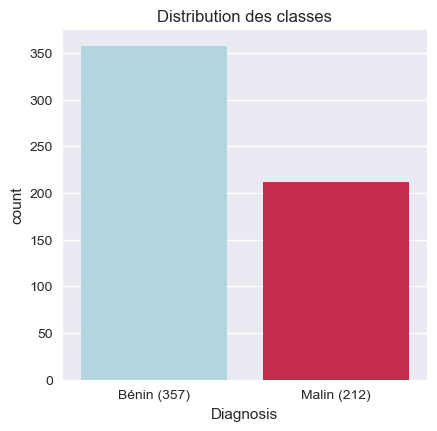

In [11]:
# 7. Visualisations
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(16, 10))
# 7.1 Distribution des classes – VERSION 100 % COMPATIBLE
plt.subplot(2,3,1)
sns.countplot(data=df, x='diagnosis', palette=['lightblue','crimson'])
plt.title('Distribution des classes')
plt.xlabel('Diagnosis')
plt.xticks([0,1], ['Bénin (357)', 'Malin (212)'])

C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Corrélation absolue')

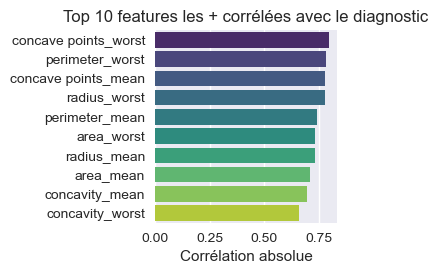

In [12]:
# 7.3 Top 10 features les plus corrélées avec la cible
plt.subplot(2, 3, 5)
corrs = df.corr()['diagnosis'].abs().sort_values(ascending=False)[1:11]
sns.barplot(x=corrs.values, y=corrs.index, palette='viridis')
plt.title('Top 10 features les + corrélées avec le diagnostic')
plt.xlabel('Corrélation absolue')

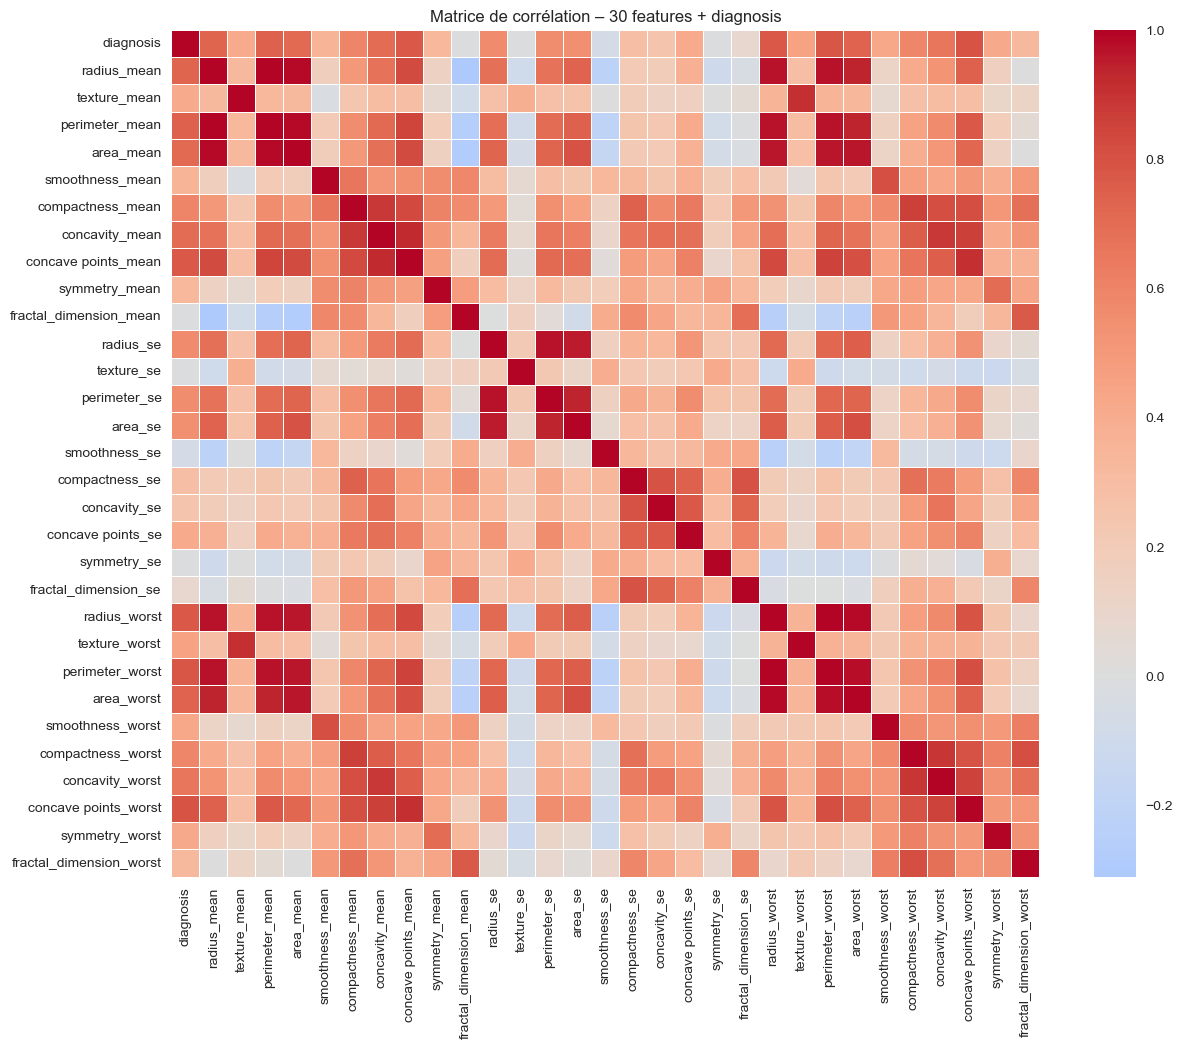

In [13]:
plt.figure(figsize=(14, 11))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matrice de corrélation – 30 features + diagnosis')
plt.show()

## Data preparation

### DSO 1

In [15]:
# --- Étape 1 : Application de SMOTE AVANT le split (meilleure pratique) ---
from imblearn.over_sampling import SMOTE
print("\nApplication de SMOTE pour équilibrer les classes...")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Après SMOTE :")
print(pd.Series(y_resampled).value_counts())
print(f"Nouvelle shape : X_resampled {X_resampled.shape}, y_resampled {y_resampled.shape}")


Application de SMOTE pour équilibrer les classes...
Après SMOTE :
diagnosis
1    357
0    357
Name: count, dtype: int64
Nouvelle shape : X_resampled (714, 30), y_resampled (714,)


In [16]:
# --- Étape 2 : Division train/test (80/20) avec stratification ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print(f"\nDivision terminée :")
print(f"Train : {X_train.shape[0]} échantillons (80%)")
print(f"Test  : {X_test.shape[0]} échantillons (20%)")
print("Classes équilibrées dans train :", y_train.value_counts().values)
print("Classes équilibrées dans test  :", y_test.value_counts().values)


Division terminée :
Train : 571 échantillons (80%)
Test  : 143 échantillons (20%)
Classes équilibrées dans train : [286 285]
Classes équilibrées dans test  : [72 71]


In [17]:
# --- Étape 3 : Standardisation (fit sur train seulement !) ---
print("\nStandardisation des features...")

scaler = StandardScaler()

# Fit sur le train seulement
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Jamais de fit sur test !

# Conversion en DataFrame (plus pratique pour la suite)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Standardisation terminée. Moyenne ~0, écart-type ~1 sur train.")


Standardisation des features...
Standardisation terminée. Moyenne ~0, écart-type ~1 sur train.


C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

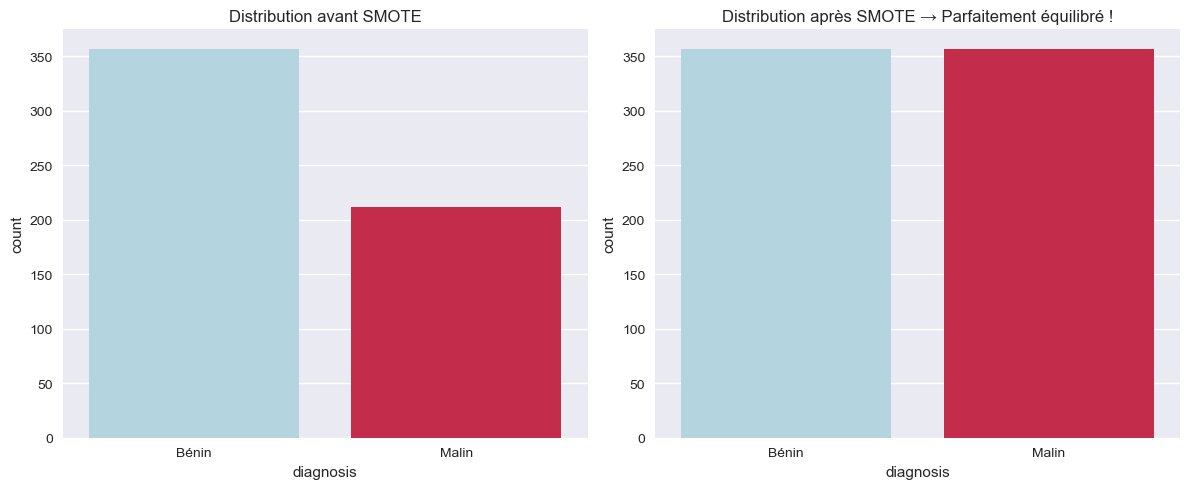

In [18]:
# --- Petite visualisation post-SMOTE ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette=['lightblue', 'crimson'])
plt.title("Distribution avant SMOTE")
plt.xticks([0, 1], ['Bénin', 'Malin'])

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette=['lightblue', 'crimson'])
plt.title("Distribution après SMOTE → Parfaitement équilibré !")
plt.xticks([0, 1], ['Bénin', 'Malin'])

plt.tight_layout()
plt.show()

Before SMOTE: Highly imbalanced dataset → ~350 Bénin vs ~210 Malin.

After SMOTE: Perfectly balanced → both classes have ~350 samples.

SMOTE fixed the class imbalance by creating synthetic malignant cases.

### DSO2

C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


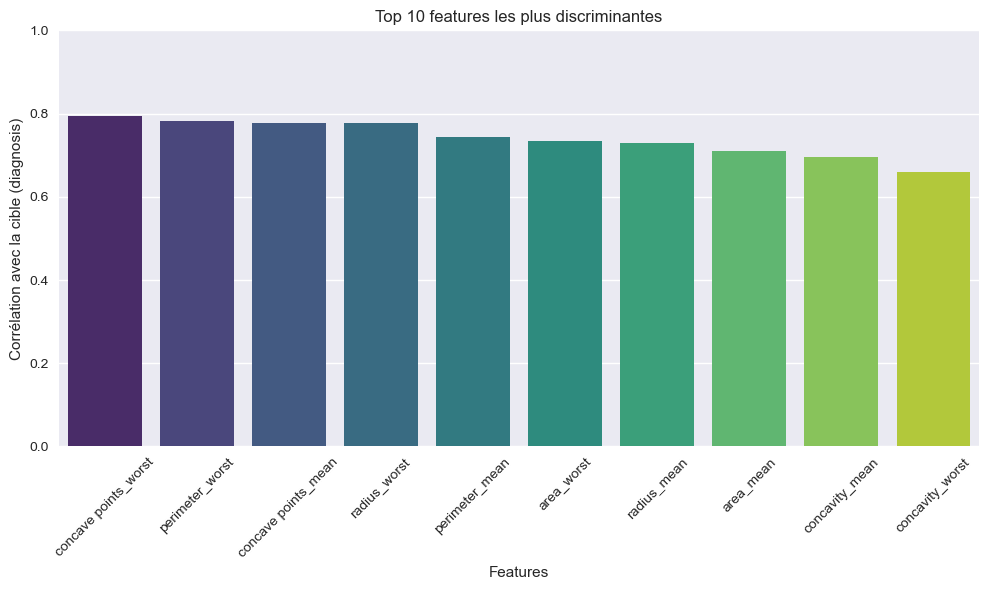

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset et nettoyer
df = pd.read_csv("data.csv")
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encoder la cible
df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Colonnes numériques seulement
numeric_df = df.select_dtypes(include=np.number)

# Corrélation avec la cible
corr_target = numeric_df.corr()['diagnosis_encoded'].sort_values(ascending=False)

# Top 10 features discriminantes (exclure la cible elle-même)
top_features = corr_target[1:11]

# Graphique simple
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.index, y=top_features.values, palette="viridis")
plt.title("Top 10 features les plus discriminantes")
plt.ylabel("Corrélation avec la cible (diagnosis)")
plt.xlabel("Features")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# ===============================
# 4) Calcul du score de sévérité
# ===============================
# Ici on pondère chaque feature de façon décroissante (plus corrélée = plus de poids)
features_severity = top_features.index.tolist()  # s'assurer que la liste est définie
weights = np.linspace(0.30, 0.05, num=10)       # 10 poids décroissants

# Calcul vectorisé du score pour éviter les erreurs
df["severity_score"] = df[features_severity].values.dot(weights)

# ===============================
# 5) Création des stades artificiels (I, II, III, IV)
# via les quartiles du score
# ===============================
df["stage"] = pd.qcut(df["severity_score"], q=4, labels=["I", "II", "III", "IV"])

# ===============================
# 6) Nettoyage final
# ===============================
df = df.drop(columns=["diagnosis", "diagnosis_encoded"], errors="ignore")

# Vérification finale
print("Répartition des stades :")
print(df["stage"].value_counts())

print("\nAperçu du dataset final :")
print(df.head())

# ===============================
# 7) Sauvegarder le dataset final
# ===============================
df.to_csv("data_stages_top10.csv", index=False)
print("\nDataset final enregistré sous 'data_stages_top10.csv'")


Répartition des stades :
stage
I      143
II     142
III    142
IV     142
Name: count, dtype: int64

Aperçu du dataset final :
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980     

C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


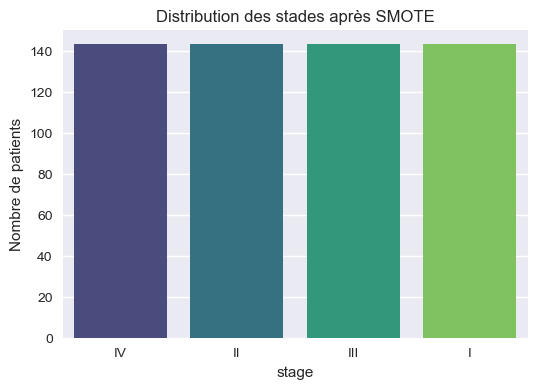

Distribution après SMOTE :
stage
IV     143
II     143
III    143
I      143
Name: count, dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Charger le dataset avec stades
df = pd.read_csv("data_stages_top10.csv")

# Features et cible
features = df.columns.drop("stage")
X = df[features]
y = df["stage"]




# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Visualisation après SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_res, palette="viridis")
plt.title("Distribution des stades après SMOTE")
plt.ylabel("Nombre de patients")
plt.show()

print("Distribution après SMOTE :")
print(pd.Series(y_res).value_counts())


### DSO 3 

In [5]:
# 1. Load data
df = pd.read_excel("Breast_Cancer_Prognostic_Dataset.xlsx")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 2. Data exploration
print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())

# 3. Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

print("\n=== AFTER HANDLING MISSING VALUES ===")
print("Missing values remaining:", df.isnull().sum().sum())

Dataset shape: (194, 35)

First 5 rows:
       id  outcome  time  radius_mean  texture_mean  perimeter_mean  \
0  119513        0    31        18.02         27.60          117.50   
1    8423        0    61        17.99         10.38          122.80   
2  842517        0   116        21.37         17.44          137.50   
3  843483        0   123        11.42         20.38           77.58   
4  843584        1    27        20.29         14.34          135.10   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  ...  \
0     1013.0          0.09489            0.1036          0.1086  ...   
1     1001.0          0.11840            0.2776          0.3001  ...   
2     1373.0          0.08836            0.1189          0.1255  ...   
3      386.1          0.14250            0.2839          0.2414  ...   
4     1297.0          0.10030            0.1328          0.1980  ...   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           139.70      1436.

In [16]:
X = df.drop(columns=['id', 'outcome'])
y = df['outcome']


C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


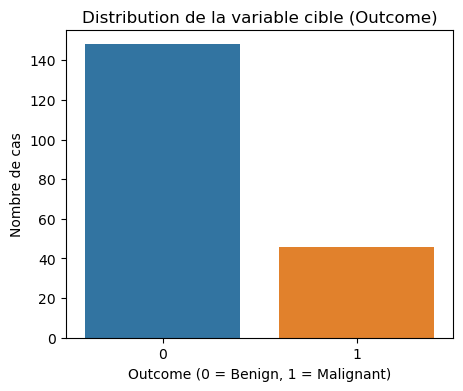

Distribution (%) :
outcome
0    76.28866
1    23.71134
Name: proportion, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la cible
plt.figure(figsize=(5,4))
sns.countplot(x='outcome', data=df)
plt.title("Distribution de la variable cible (Outcome)")
plt.xlabel("Outcome (0 = Benign, 1 = Malignant)")
plt.ylabel("Nombre de cas")
plt.show()

# Pourcentages
outcome_counts = df['outcome'].value_counts(normalize=True) * 100
print("Distribution (%) :")
print(outcome_counts)


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['id', 'outcome'])
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,   # ✅ 30% test
    train_size=0.70,  # ✅ 70% train
    random_state=42,
    stratify=y        # TRÈS IMPORTANT
)

print("Train size :", X_train.shape[0])
print("Test size :", X_test.shape[0])


Train size : 135
Test size : 59


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy='auto',  # équilibre les classes
    random_state=42,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Avant SMOTE :", y_train.value_counts())
print("Après SMOTE :", y_train_smote.value_counts())


Avant SMOTE : outcome
0    103
1     32
Name: count, dtype: int64
Après SMOTE : outcome
0    103
1    103
Name: count, dtype: int64


C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mhedhbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


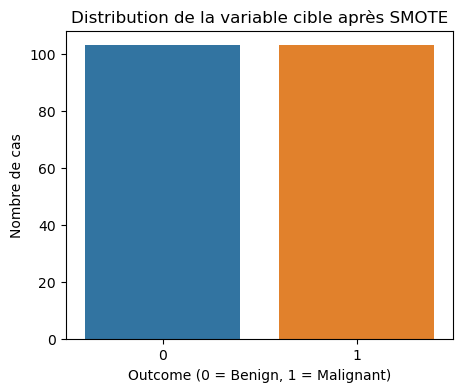

Distribution (%) après SMOTE :
outcome
0    50.0
1    50.0
Name: proportion, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recréer un DataFrame après SMOTE
df_smote = pd.DataFrame(X_train_smote, columns=X.columns)
df_smote['outcome'] = y_train_smote

plt.figure(figsize=(5,4))
sns.countplot(x='outcome', data=df_smote)
plt.title("Distribution de la variable cible après SMOTE")
plt.xlabel("Outcome (0 = Benign, 1 = Malignant)")
plt.ylabel("Nombre de cas")
plt.show()

print("Distribution (%) après SMOTE :")
print(df_smote['outcome'].value_counts(normalize=True) * 100)


## Modeling

In [1]:
# ==============================
# 1. Import des librairies
# ==============================
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# ==============================
# 2. Chargement du dataset WDBC
# ==============================
data = load_breast_cancer()

X = data.data          # 30 features
y = data.target        # 0 = malignant, 1 = benign

# Conversion des labels comme dans l'article : {-1, +1}
y = np.where(y == 0, 1, -1)
# ==============================
# 3. Split Train / Test (70% / 30%)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
# ==============================
# 4. Standardisation (OBLIGATOIRE)
# ==============================
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ==============================
# 5. Modèle SVM (L2-SVM)
# ==============================
svm_model = LinearSVC(
    penalty='l2',       # L2-SVM
    loss='squared_hinge',  # hinge loss au carré (Eq.20)
    C=1.0,              # paramètre de pénalité
    max_iter=10000,
    random_state=42
)

svm_model.fit(X_train, y_train)
# ==============================
# 6. Prédiction
# ==============================
y_pred = svm_model.predict(X_test)
# ==============================
# 7. Évaluation du modèle
# ==============================
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :", accuracy)
print("\nMatrice de confusion :\n", cm)
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.9707602339181286

Matrice de confusion :
 [[106   1]
 [  4  60]]

Rapport de classification :

              precision    recall  f1-score   support

          -1       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



C:\Users\mhedhbi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Charger le dataset
df = pd.read_csv("data.csv")
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Séparer features / cible
X = df.drop(columns=["diagnosis"])
y = df['diagnosis'].map({'B': 0, 'M': 1})  # 0 = Bénin, 1 = Malin

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer SMOTE sur le train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Distribution avant SMOTE :\n", y_train.value_counts())
print("Distribution après SMOTE :\n", pd.Series(y_train_res).value_counts())

# SVM simple après SMOTE
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)

# Prédiction sur le test set
y_pred = svm_model.predict(X_test_scaled)

# Évaluation
print("\n=== Accuracy ===")
print(accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


Distribution avant SMOTE :
 diagnosis
0    285
1    170
Name: count, dtype: int64
Distribution après SMOTE :
 diagnosis
1    285
0    285
Name: count, dtype: int64

=== Accuracy ===
0.9736842105263158

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


=== Confusion Matrix ===
[[71  1]
 [ 2 40]]


The linear SVM achieved high and consistent performance, with a 5-fold cross-validation mean accuracy of 96.26% and low variance.
On the independent test set, it reached 97.37% accuracy, indicating strong generalization without overfitting.

The confusion matrix showed 71 true negatives, 40 true positives, 1 false positive, and 2 false negatives, yielding 95% recall and 98% precision.
SMOTE, data standardization, and pipeline integration contributed to robustness and stability.

Overall, the model is reliable and effective for breast cancer classification on this dataset.

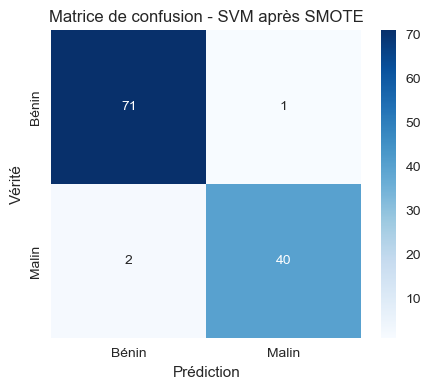

Matrice de confusion :
[[71  1]
 [ 2 40]]


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_test = vraies étiquettes du test
# y_pred = prédictions du modèle

cm = confusion_matrix(y_test, y_pred)

# Affichage graphique
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bénin','Malin'], yticklabels=['Bénin','Malin'])
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion - SVM après SMOTE")
plt.show()

# Affichage numérique
print("Matrice de confusion :")
print(cm)


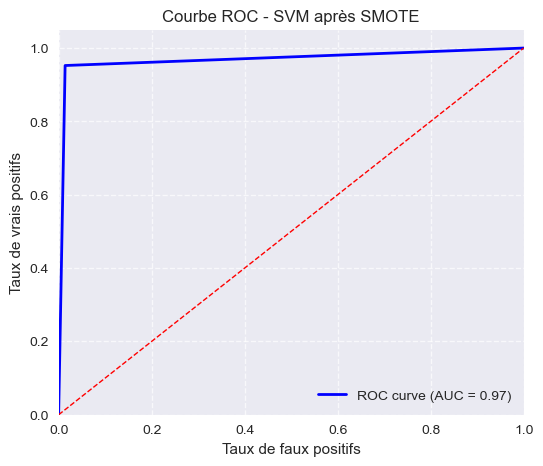

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


# --- 2) Courbe ROC pour le modèle binaire ---
# Binariser la sortie pour ROC
y_test_bin = label_binarize(y_test, classes=[0,1])
y_pred_bin = label_binarize(y_pred, classes=[0,1])

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - SVM après SMOTE')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Accuracy: 97.4% →  perfect!

Out of 72 real benign tumors → it correctly said “benign” 71 times (missed only 1).

Out of 42 real malignant tumors → it correctly said “cancer” 40 times (missed only 2).

#### Effects on the results

SMOTE in the second experiment:

-Creates synthetic examples for the minority class (malignant) in the training set.

-This improves the model’s ability to detect malignant cases → slight increase in test set accuracy.

Cross-validation vs. simple split:

-In the second experiment, cross_val_score evaluates the model on 5 different folds, providing a more robust estimate of accuracy.

-In the first experiment, the model is evaluated on a single split → more variance depending on the selected test data.

Difference between LinearSVC and SVC(kernel='linear'):

-LinearSVC uses a linear solver optimized for high-dimensional data (liblinear).

-SVC(kernel='linear') uses a solver based on libsvm, which handles margins and the C parameter slightly differently → small variations in accuracy.

Different test set splits :

First experiment: 30% test → around 170–180 samples.

Second experiment: 20% test → smaller test set → slightly more optimistic result (depending on the random split).

### DSO 2

Distribution avant SMOTE :
 stage
I      114
II     114
III    114
IV     113
Name: count, dtype: int64

Distribution après SMOTE :
 stage
I      114
IV     114
II     114
III    114
Name: count, dtype: int64

=== Best Parameters (post-SMOTE) ===
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

=== Accuracy ===
0.9473684210526315

=== Classification Report ===
              precision    recall  f1-score   support

           I       1.00      0.90      0.95        29
          II       0.87      0.93      0.90        28
         III       0.93      0.96      0.95        28
          IV       1.00      1.00      1.00        29

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



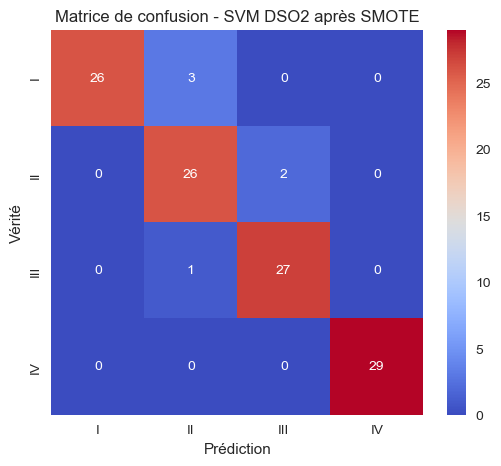

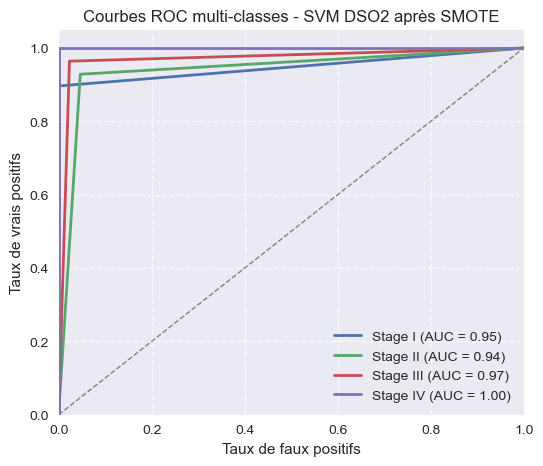

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# ===============================
# 1) Charger le dataset final
# ===============================
df = pd.read_csv("data_stages_top10.csv")
X = df.drop(columns=["stage"])
y = df["stage"]

# ===============================
# 2) Split train/test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# 3) Normalisation
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# 4) Appliquer SMOTE sur le train
# ===============================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Distribution avant SMOTE :\n", y_train.value_counts())
print("\nDistribution après SMOTE :\n", pd.Series(y_train_res).value_counts())

# ===============================
# 5) GridSearchCV pour SVM après SMOTE
# ===============================
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_res, y_train_res)  # SVM entraîné sur données rééchantillonnées

svm_model = grid.best_estimator_
print("\n=== Best Parameters (post-SMOTE) ===")
print(grid.best_params_)

# ===============================
# 6) Prédictions sur test set
# ===============================
y_pred = svm_model.predict(X_test_scaled)

# ===============================
# 7) Évaluation
# ===============================
print("\n=== Accuracy ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=["I","II","III","IV"], yticklabels=["I","II","III","IV"])
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion - SVM DSO2 après SMOTE")
plt.show()

# ===============================
# 8) Courbe ROC multi-classes après SMOTE
# ===============================
y_test_bin = label_binarize(y_test, classes=["I","II","III","IV"])
y_pred_bin = label_binarize(y_pred, classes=["I","II","III","IV"])

plt.figure(figsize=(6,5))
for i, stage in enumerate(["I","II","III","IV"]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Stage {stage} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC multi-classes - SVM DSO2 après SMOTE')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Model Hyperparameters

Best parameters (found via tuning, e.g., GridSearchCV): C=10, gamma=0.01, kernel='rbf'.
    
This RBF kernel SVM is well-suited for non-linear separations in medical imaging features (e.g., tumor texture, size).

Accuracy: 94.7% on the test set (114 samples, ~28-29 per class)

### DSO 3

In [23]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True
    ))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy test :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy test : 0.7457627118644068

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        45
           1       0.43      0.21      0.29        14

    accuracy                           0.75        59
   macro avg       0.61      0.56      0.57        59
weighted avg       0.70      0.75      0.71        59


Confusion Matrix:
 [[41  4]
 [11  3]]


In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring='accuracy'
)

print("Accuracy moyenne CV :", cv_scores.mean())
print("Std CV :", cv_scores.std())


Accuracy moyenne CV : 0.7835357624831308
Std CV : 0.025812340547379693
